In [22]:
import pyAgrum.lib.notebook as gnb
import pyAgrum as gum
import otagrum as otagr
import openturns as ot
import os
import os.path as path
import sys
sys.path.append('..')
import hill_climbing as hc
import score as sc
import numpy as np

In [2]:
directory = "../../data/samples/dirichlet/asia/"

In [3]:
train_file = path.join(directory, "asia_dirichlet_sample_01.csv")
test_file = path.join(directory, "asia_dirichlet_sample_02.csv")
train, test = ot.Sample.ImportFromTextFile(train_file, ',')[:10000], ot.Sample.ImportFromTextFile(test_file, ',')[0:1000]

### Continuous PC

In [4]:
learner = otagr.ContinuousPC(train, 5, 0.05)
ndag = learner.learnDAG()

In [5]:
print("Description", ndag.getDescription())
print("Nodes", ndag.getNodes())
print("DAG", ndag)

Description [asia,tub,bronc,dysp,either,xray,smoke,lung]
Nodes [3,6,1,4,7,2,0,5]
DAG [asia,tub,bronc,dysp,either,xray,smoke,lung]
[dysp->either,smoke->lung,tub->either,either->xray,lung->either,bronc->dysp,bronc->smoke,asia->tub]



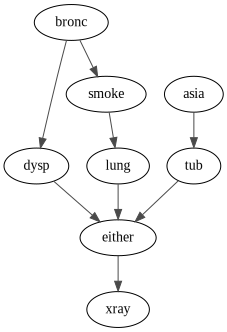

In [6]:
gnb.showDot(ndag.toDot())

In [7]:
order = ndag.getTopologicalOrder()
TTest = otagr.ContinuousTTest(train, 0.05)
jointDistributions = []  
for i in range(order.getSize()):
    d = 1+ndag.getParents(i).getSize()
    K = TTest.GetK(len(train), d)
    indices = [int(n) for n in ndag.getParents(i)]
    indices = [i] + indices
    bernsteinCopula = ot.EmpiricalBernsteinCopula(train.getMarginal(indices), K, False)
    jointDistributions.append(bernsteinCopula)

In [31]:
cbn = otagr.ContinuousBayesianNetwork(ndag, jointDistributions)
ll = 0
count=0
for (i,t) in zip(range(len(test)),test):
    print("Iteration ", i+1)
    print("Ligne en entrée ", t)
    lp = cbn.computeLogPDF(t)
    #if (np.abs(lp) < 10):
    if True:
        ll += lp
        count += 1
    print("Delta ", lp)
    print("Valeur de la somme ", ll)
    print("\n")
ll /= count

Iteration  1
Ligne en entrée  [0.643374,0.341668,0.4098,0.42481,0.91182,0.545628,0.647575,0.309097]
Delta  0.3642226146203856
Valeur de la somme  0.3642226146203856


Iteration  2
Ligne en entrée  [0.392409,0.628404,0.0137693,0.831653,0.809768,0.74872,0.337524,0.699087]
Delta  -0.30794838025697385
Valeur de la somme  0.056274234363411724


Iteration  3
Ligne en entrée  [0.982657,0.0263226,0.474658,0.105351,0.751161,0.838798,0.235174,0.449952]
Delta  0.2941616809459919
Valeur de la somme  0.3504359153094036


Iteration  4
Ligne en entrée  [0.703376,0.0641768,0.0417777,0.746767,0.218309,0.219631,0.486456,0.430522]
Delta  -0.20599892176353793
Valeur de la somme  0.14443699354586567


Iteration  5
Ligne en entrée  [0.826424,0.696205,0.97879,0,0.906403,0.142314,0.314288,0.3826]
Delta  -708.3964185322641
Valeur de la somme  -708.2519815387183


Iteration  6
Ligne en entrée  [0.463589,0.618214,0.351713,0.655232,0.792102,0.780751,0.249926,0.327515]
Delta  -0.255547064252384
Valeur de la somme 

Iteration  57
Ligne en entrée  [0.147381,0.903306,0.873776,0.395333,0,0.965643,0.544467,0.974036]
Delta  -708.3964185322641
Valeur de la somme  -2099.2225994947185


Iteration  58
Ligne en entrée  [0.247057,0.809576,0.246715,0.962142,0.236146,0.176092,0.893144,0.280382]
Delta  1.2162392805371363
Valeur de la somme  -2098.0063602141813


Iteration  59
Ligne en entrée  [0.286373,0.395154,0.411127,0.321316,0.629568,0.222794,0.630088,0.217008]
Delta  -0.3031577798857617
Valeur de la somme  -2098.309517994067


Iteration  60
Ligne en entrée  [0.977337,0.0888949,0.418014,0.166818,0.571269,0.684765,0.561111,0.178895]
Delta  0.25955660837426786
Valeur de la somme  -2098.0499613856928


Iteration  61
Ligne en entrée  [0.587424,0.303361,0.949258,0,0.945213,0.291385,0.16775,0.57393]
Delta  -708.3964185322641
Valeur de la somme  -2806.4463799179566


Iteration  62
Ligne en entrée  [0.828192,0.778131,0.32099,0.0111387,0.148608,0.923556,0.247364,0.562107]
Delta  -0.15450753422479704
Valeur de la som

KeyboardInterrupt: 

In [27]:
len(test) - count

33

In [25]:
print(jointDistributions[1])

EmpiricalBernsteinCopula( copulaSample=       [ tub       asia      ]
   0 : [ 0.828494  0.759812  ]
   1 : [ 0.0638767 0.6665    ]
   2 : [ 0.298358  0.664598  ]
...
9985 : [ 0.0879055 0.973969  ]
9986 : [ 0.495194  0.0632759 ]
9987 : [ 0.472667  0.312675  ] binNumber=22)


In [26]:
print("LL", ll)

LL 0.4337796734151631


### Elidan

In [ ]:
c,g,s = hc.hill_climbing(train, 4, 4)

In [ ]:
print("Copula", c)
print("DAG", g)
print("Score", s)

In [ ]:
ll = sc.log_likelihood(test, c, g)/test.getSize()

In [ ]:
print("LL", ll)